Visualizations:

In [1]:
import pandas as pd
df = pd.read_csv("cleaned_groceries.csv")
df1 = pd.read_csv("encoded_baskets.csv")

In [2]:
import plotly.express as px

Hierarchical Chart      Note: pip install nbformat --upgrade 

In [3]:
item_count = df['mapped'].value_counts().reset_index()
item_count.columns = ['item', 'count']

In [4]:
fig=px.sunburst(item_count,path=['item'],values='count',color='count',color_continuous_scale='Blues',title='Item Distribution')
fig.update_layout(width=800, height=600)
fig.show()

Co-occurrence Heatmap 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
co_occurrence = df1.T.dot(df1)
t20 = co_occurrence.sum().sort_values(ascending=False).head(20).index
co_occurrence_top = co_occurrence.loc[t20, t20]

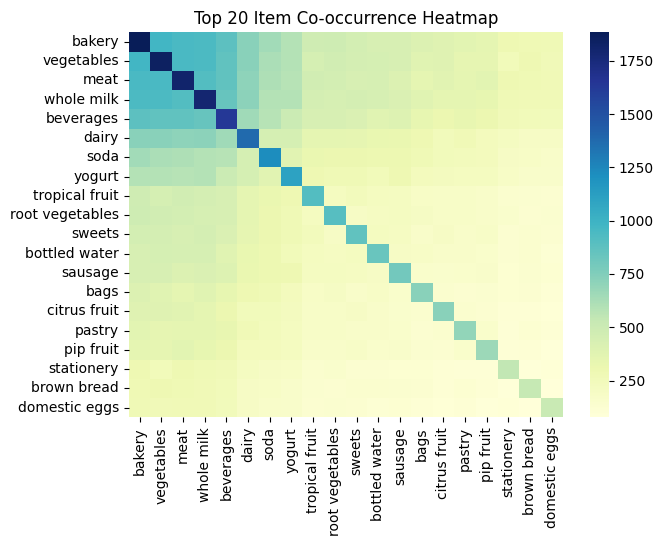

In [7]:
plt.figure(figsize=(7,5))
sns.heatmap(co_occurrence_top, fmt='d', cmap='YlGnBu')
plt.title('Top 20 Item Co-occurrence Heatmap')
plt.show()

Word Cloud – Most Popular Items

In [8]:
from wordcloud import WordCloud

In [9]:
filtered_baskets = pd.read_csv("filtered_baskets.csv")

filtered_baskets["basket"] = filtered_baskets["basket"].apply(eval)
filtered_baskets = filtered_baskets["basket"]

all_filtered_items = [item for basket in filtered_baskets for item in basket]


In [10]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

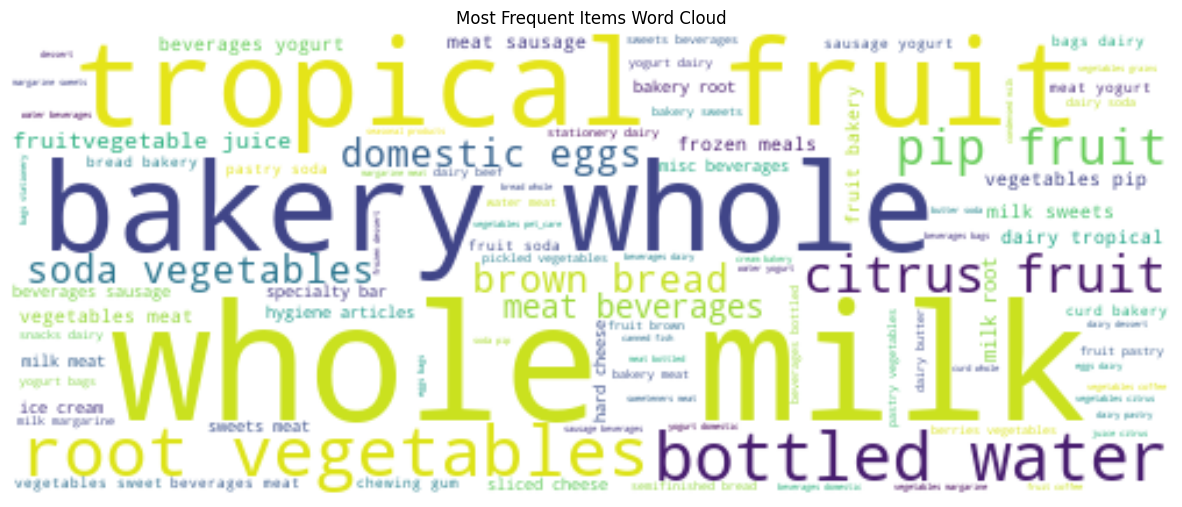

In [11]:
text = ' '.join(all_filtered_items)
wc = WordCloud(width=500, height=200, background_color='white').generate(text)
plt.figure(figsize=(15,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Items Word Cloud')
plt.show()
